In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv("files/AMS/context_data_norm.csv", index_col=0)

In [3]:
bic = pd.DataFrame(columns=['n', 'bic', 'run'])
ix = 0

n_components_range = range(42, 60, 6)
gmmruns = 1

In [4]:
sample = data
for n_components in n_components_range:
    for i in range(gmmruns):
        gmm = GaussianMixture(n_components=n_components, covariance_type="full", max_iter=200, n_init=1, verbose=1)
        fitted = gmm.fit(sample)
        bicnum = gmm.bic(data)
        bic.loc[ix] = [n_components, bicnum, i]
        ix += 1

        print(n_components, i, "BIC:", bicnum)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged: True
42 0 BIC: 17429267.163517594
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True
48 0 BIC: 16690506.355102787
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged: True
54 0 BIC: 14949218.130364686


In [6]:
bic.to_clipboard()

In [7]:
bic21 = pd.read_csv('files/AMS/complete_BIC.csv')

In [8]:
bic = bic21.append(bic)

/home/arch_ubuntu/miniconda/envs/momepy_env/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
bic

,Unnamed: 0,bic,n,run
0,0.0,7.680704e+07,2.0,0.0
1,1.0,7.680704e+07,2.0,1.0
2,2.0,7.680704e+07,2.0,2.0
3,3.0,4.144076e+07,6.0,0.0
4,4.0,4.150102e+07,6.0,1.0
5,5.0,4.143845e+07,6.0,2.0
6,6.0,3.256084e+07,10.0,0.0
7,7.0,3.328496e+07,10.0,1.0
8,8.0,3.452905e+07,10.0,2.0
9,9.0,2.833618e+07,14.0,0.0


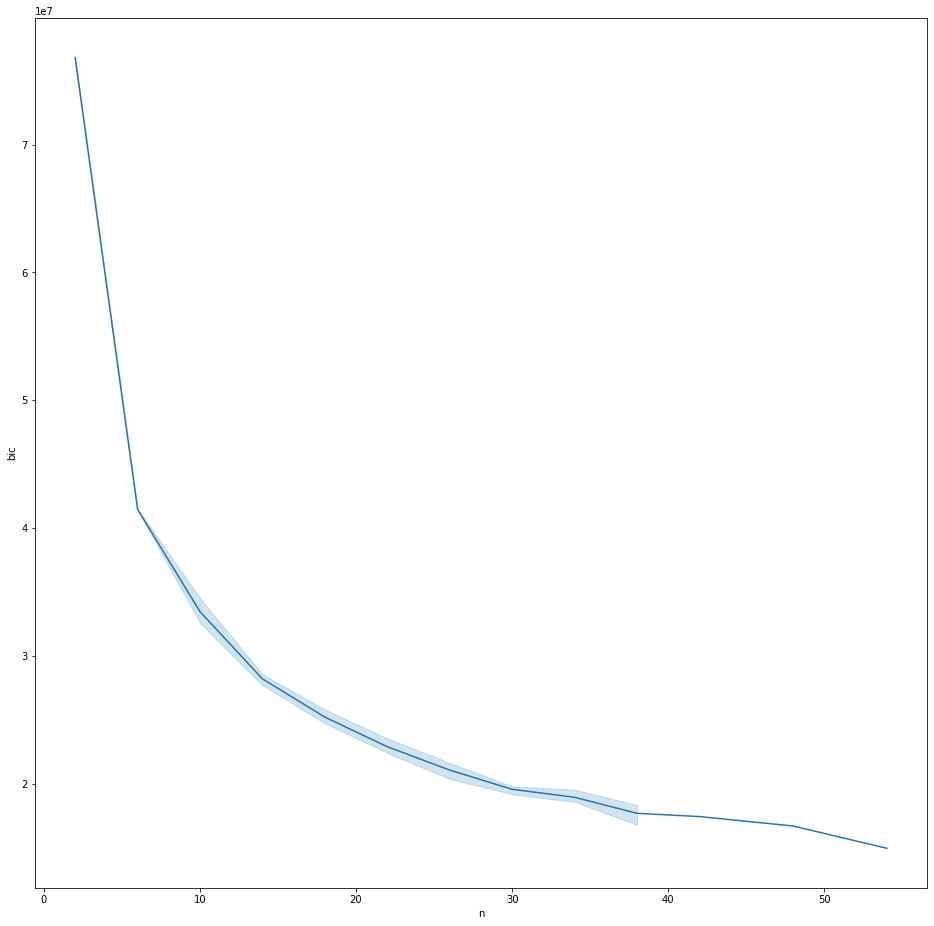

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x='n', y='bic', data=bic)

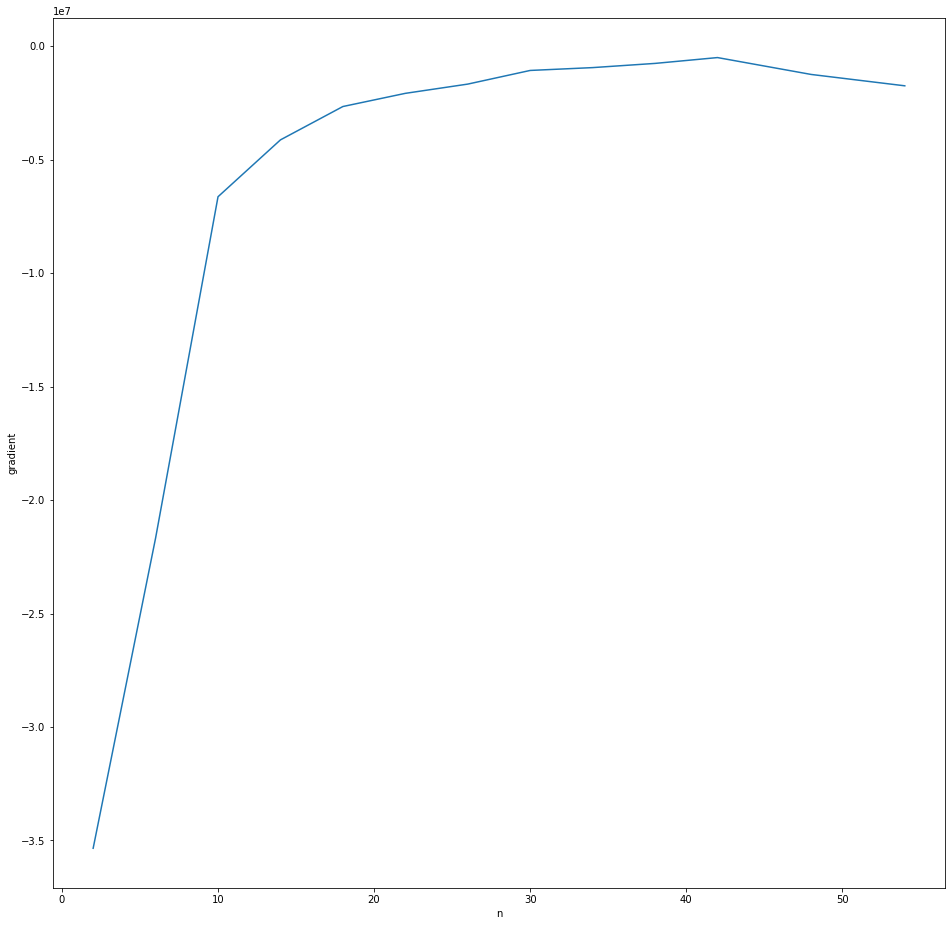

In [11]:
gradients = []

group = bic.groupby('n').mean()
group['gradient'] = np.gradient(group.bic)
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x='n', y='gradient', data=group.reset_index())

In [13]:
group

,Unnamed: 0,bic,run,gradient
n,,,,
2.0,1.0,7.680704e+07,1.0,-3.534697e+07
6.0,4.0,4.146007e+07,1.0,-2.167438e+07
10.0,7.0,3.345828e+07,1.0,-6.629987e+06
14.0,10.0,2.820010e+07,1.0,-4.123890e+06
18.0,13.0,2.521050e+07,1.0,-2.653924e+06
22.0,16.0,2.289225e+07,1.0,-2.073284e+06
26.0,19.0,2.106393e+07,1.0,-1.665534e+06
30.0,22.0,1.956118e+07,1.0,-1.063862e+06
34.0,25.0,1.893621e+07,1.0,-9.388299e+05


In [14]:
add = []
for n in range(2, 55):
    if n not in group.index:
        add.append(n)

In [16]:
add_df = pd.DataFrame(index=add, columns=group.columns)

In [18]:
bic_int = group.append(add_df)

In [20]:
bic_int.sort_index(inplace=True)

In [22]:
bic_int['bic'] = bic_int['bic'].interpolate()

In [23]:
bic_int

,Unnamed: 0,bic,run,gradient
2.0,1.0,7.680704e+07,1.0,-3.534697e+07
3.0,NaN,6.797030e+07,NaN,NaN
4.0,NaN,5.913356e+07,NaN,NaN
5.0,NaN,5.029682e+07,NaN,NaN
6.0,4.0,4.146007e+07,1.0,-2.167438e+07
7.0,NaN,3.945963e+07,NaN,NaN
8.0,NaN,3.745918e+07,NaN,NaN
9.0,NaN,3.545873e+07,NaN,NaN
10.0,7.0,3.345828e+07,1.0,-6.629987e+06
11.0,NaN,3.214374e+07,NaN,NaN


In [25]:
bic_int['gradient'] = np.gradient(bic_int.bic)

In [28]:
bic_int.reset_index()

,index,Unnamed: 0,bic,run,gradient
0,2.0,1.0,7.680704e+07,1.0,-8.836742e+06
1,3.0,NaN,6.797030e+07,NaN,-8.836742e+06
2,4.0,NaN,5.913356e+07,NaN,-8.836742e+06
3,5.0,NaN,5.029682e+07,NaN,-8.836742e+06
4,6.0,4.0,4.146007e+07,1.0,-5.418595e+06
5,7.0,NaN,3.945963e+07,NaN,-2.000448e+06
6,8.0,NaN,3.745918e+07,NaN,-2.000448e+06
7,9.0,NaN,3.545873e+07,NaN,-2.000448e+06
8,10.0,7.0,3.345828e+07,1.0,-1.657497e+06
9,11.0,NaN,3.214374e+07,NaN,-1.314546e+06


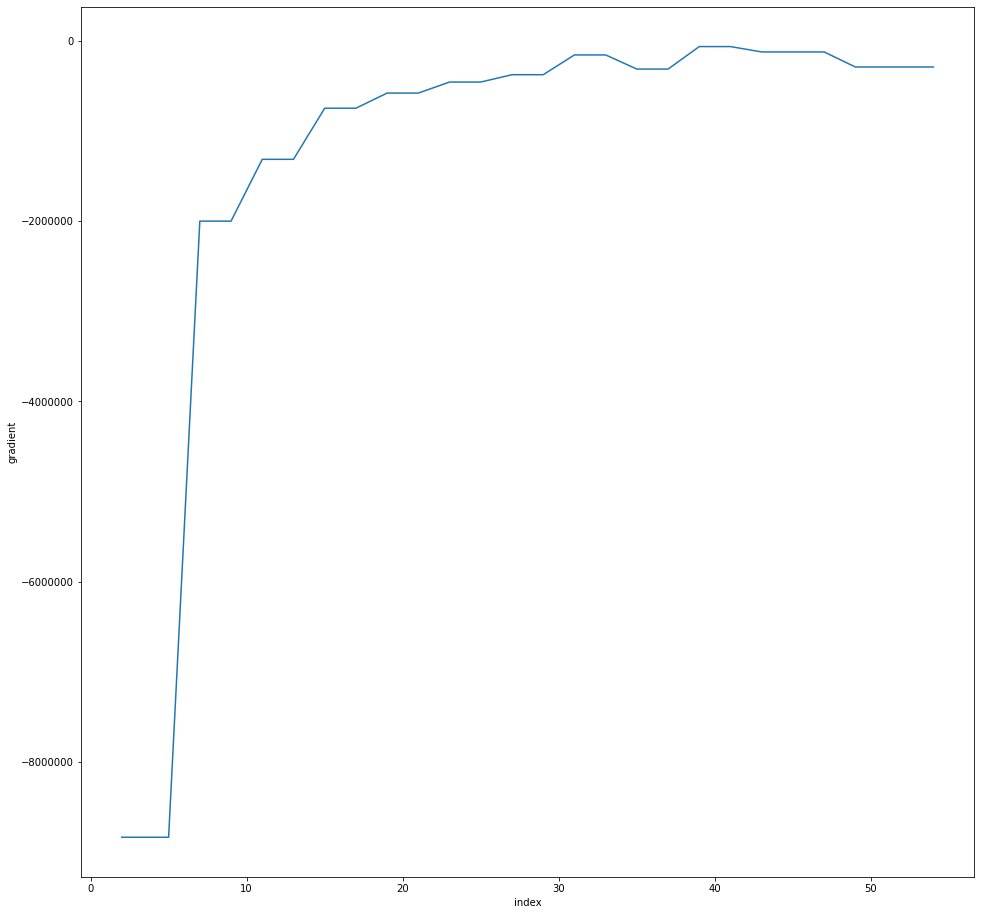

In [30]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x='index', y='gradient', data=bic_int.reset_index())